In [26]:
from __future__ import division, print_function
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import stats
import scipy.stats as stats
import random
#Построение таблицы с данными и тест Колмогорова
import csv
import pandas as pd, scipy

## Считывание и преобразование данных

In [27]:
df = pd.read_csv('traffic.csv', sep=',', error_bad_lines=False)
new_df = df.shift().reset_index()
new_df.drop('index', axis=1, inplace=True)
new_df = new_df[new_df['No.'].notna()]
display(new_df)

z = new_df['Delta'].values

# Виыбираю рандомно 100 элементов из списка
x = random.choices(z, k=100)

,No.,Time,Protocol,Length,Delta,UTC
1,3.0,0.024310,UDP,102.0,0.018915,17:49:43.218267
2,4.0,0.026144,UDP,154.0,0.001834,17:49:43.220101
3,5.0,0.046636,UDP,156.0,0.020492,17:49:43.240593
4,6.0,0.068658,UDP,145.0,0.022022,17:49:43.262615
5,7.0,0.068658,UDP,349.0,0.000000,17:49:43.262615
...,...,...,...,...,...,...
16765,104303.0,300.232367,UDP,220.0,0.007462,17:54:43.426324
16766,104304.0,300.249738,UDP,94.0,0.017371,17:54:43.443695
16767,104307.0,300.255462,UDP,203.0,0.002105,17:54:43.449419
16768,104308.0,300.268826,UDP,1256.0,0.013364,17:54:43.462783


# График данных

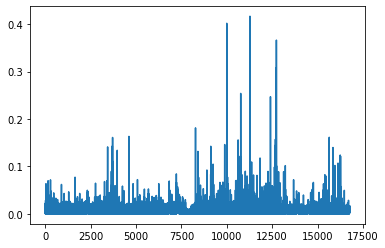

In [21]:
plt.plot(new_df['Delta'])
plt.show()

## Проверка гипотез

Если значение **pvalue** значенимо ($pvlaue < 0.05$), то гипотеза о соответсвии распределения отвергается

### Нормальное распределение

In [22]:
stats.kstest(x, 'norm')

KstestResult(statistic=0.5000047873073648, pvalue=1.2118183928355768e-23)

### равномерное распределение

In [23]:
stats.kstest(x, 'uniform')

KstestResult(statistic=0.946449, pvalue=1.5058770257544143e-127)

### экспоненциальное

In [24]:
stats.kstest(x, 'expon')

KstestResult(statistic=0.9467241604664086, pvalue=8.996241414476446e-128)

# Гипотеза была отвергнута, так как не подошли данные